# MENG 21200 - Final Exam
**University of Chicago, *March 8-9, 2023***

## Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
from scipy.optimize import minimize, fsolve
from math import dist
plt.rcParams['figure.figsize'] = [8, 8]


## Problem 1 (30 points)

Idealized spring-mass systems have numerous applications throughout engineering.  The figure below illustrates an arrangement of five plates interconnected in series by five springs and which is being depressed under a mass of 3000 kg.  

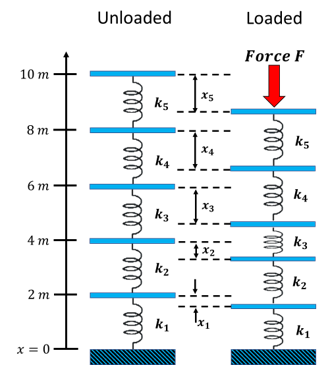

At equilibrium, force balance equations can be developed defining the interrelationships between the springs, where the $k$'s represent the spring constants and the $x$'s are the displacements of the plates from the unloaded (i.e., zero mass added) configuation of the system.  For example, the force balance on Plate 1 (between springs 1 and 2) at equilibrium is given by

$$ k_2\left(x_2-x_1\right)=k_1x_1 $$

**(a)** Define the equations that specify the positions of all of the plates at equilibrium.

In [2]:
# initialise constants
# assume g = 10 N/kg
k = [150, 50, 75, 225, 100] #kN/m
F = 30 #kN

In [3]:
# these equations are of the same form as the one provided as an example, except with all terms moved to one side
def soe(x):
    f = [0 for i in range (5)]
    # easier to define with a for loop, but i will write them out
    f[0] = k[1] * (x[1] - x[0]) - k[0] * x[0]
    f[1] = k[2] * (x[2] - x[1]) - k[1] * (x[1] - x[0])
    f[2] = k[3] * (x[3] - x[2]) - k[2] * (x[2] - x[1])
    f[3] = k[4] * (x[4] - x[3]) - k[3] * (x[3] - x[2])
    f[4] = k[4] * (x[4] - x[3]) - F
    return f

**(b)**  Solve for the relative displacements $x$ of each plate if $k_1 = 150$, $k_2 = 50$, $k_3 = 75$, $k_4 = 225$, and $k_5 = 100$ kN/m.

In [4]:
soln = fsolve(soe, np.zeros(5))
print('Relative displacements (m):')
xRel = []
xAbs = []
for i in range(5):
    x = round(soln[i], 3)
    xRel.append(x)
    # (i + 1) * 2 gives the initial position
    xAbs.append((i + 1) * 2 - x)
    print(f'x{i + 1}: {x}')

Relative displacements (m):
x1: 0.2
x2: 0.8
x3: 1.2
x4: 1.333
x5: 1.633


**(c)** What is the corresponding absolute height of each plate?

In [5]:
print('Absolute height (m):')
for i in range(5):
    print(f'x{i + 1}: {xAbs[i]}')

Absolute height (m):
x1: 1.8
x2: 3.2
x3: 4.8
x4: 6.667
x5: 8.367


**(d)** Perform a sensitivity analysis by plotting the absolute height of each plate as a function of the applied mass for masses from 0 to 5000 kg in 10 kg increments. 

In [6]:
Flist = np.arange(0, 50, 0.1) #kN
xlist = [[] for i in range (5)]
for F in Flist:
    soln = fsolve(soe, np.zeros(5))
    for i in range(5):
        xlist[i].append((i + 1) * 2 - soln[i])

/Users/lihrek/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Text(0.5, 1.0, 'Absolute Height vs Force')

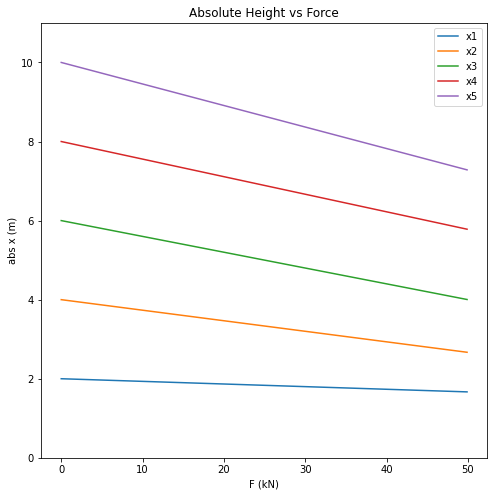

In [7]:
for i in range(5):
    plt.plot(Flist, xlist[i], label=f'x{i + 1}')
plt.legend()
plt.ylim(0, 11)
plt.xlabel('F (kN)')
plt.ylabel('abs x (m)')
plt.title('Absolute Height vs Force')

**(e)** You now wish to generalize your analysis in part (d) to consider systems with N springs being depressed by M different masses.  What was the computational complexity of the method that you applied with respect to N and M?  Justify your answer.

Solving systems of $M$ different masses, each with $N$ springs means solving $M$ systems of $N$ linear equations. We know that the computational complexity of solving a system of $N$ equations is at most $O(N^3)$, and that complexity scales linearly with additional systems. Therefore, computational complexity is at most $O(M\times N^3)$.

**(f)** Could you have done better?  Explain how and the computational complexity of that method.

Yes. We can recognise that the displacement of each plate ($x$) has a linear relationship with force ($F$), assuming that the springs have the same spring constants. Therefore, instead of brute forcing the solutions to $N$ systems, we can simply solve one system, and mutiply the solutions by a scaling factor for all other $M-1$ systems. The computational complexity in this case would be at most $O(N^3 + N \times M)$. If the spring constants are not the same for each system, another way to improve the method is through using a more efficient solver than fsolve. There are methods that can reduce the computational complexity of solving linear equations to $O(N^k)$, where $2 < k < 3$.

## Problem 2 (30 points)

A thick string is hanging from two supports at  points A and B as illustrated in red in the figure below.  The string supports a distributed load whose magnitude varies with $x$ as

$$ w=w_0\left[1+sin\left(\frac{\pi x}{2l_B}\right)\right] $$

where $w_0 = 10$ lbs/ft. The lowest point in the string occurs at $x=0$, which is dictated by the tension in the string $T_0$. The differential equation that governs the string is 

$$\frac{d^2y}{dx^2} = \frac{w_0}{T_0}\left[1+sin\left(\frac{\pi x}{2l_B}\right)\right] $$

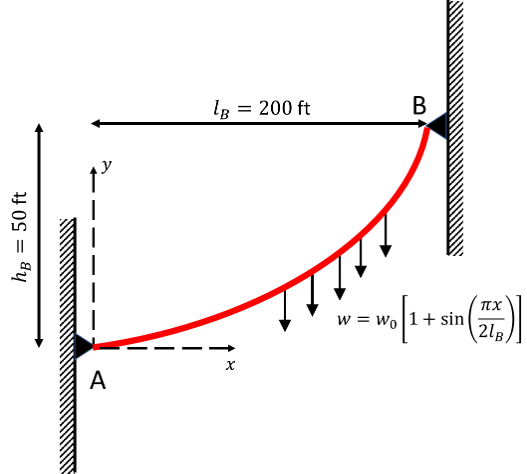

**(a)**  Plot the shape of the string when $T_0 = 1000$ lbs. 

In [8]:
# setting up constants and functions
w0 = 10
T0 = 1000
lb = 200

def ode(x, y):
    return np.array([y[1], w0 / T0 * (1 + np.sin(np.pi * x / (2 * lb)))])
def bc(ya, yb):
    return np.array([ya[0], yb[0] - 50])

In [9]:
# solving bvp
xlist = np.linspace(0, 200, 10000)
y0 = np.ones((2, xlist.size))
soln = solve_bvp(ode, bc, xlist, y0)

Text(0, 0.5, 'y (ft)')

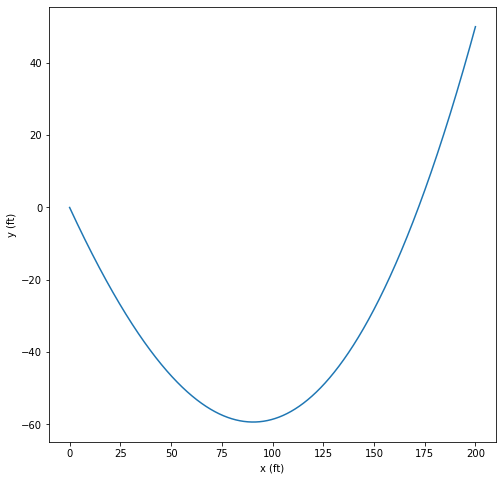

In [10]:
# plotting y vs x
plt.plot(xlist, soln.y[0])
plt.xlabel('x (ft)')
plt.ylabel('y (ft)')

**(b)**  Plot the slope of the string.  What is the slope of the string at point A?

Slope at point A: -1.213


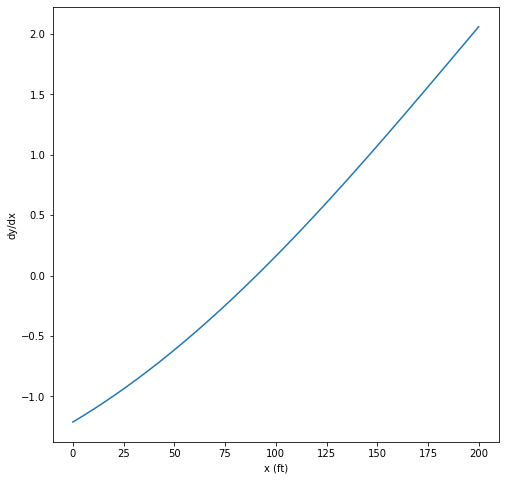

In [11]:
# plotting dy/dx vs x
plt.plot(xlist, soln.y[1])
plt.xlabel('x (ft)')
plt.ylabel('dy/dx')
print(f'Slope at point A: {round(soln.y[1][0], 3)}')

**(c)** What is the total length of the string?

Since we have a list of coordinates for points on the string, we can use math.dist to figure out the distance between adjacent points, and sum them together

In [12]:
totalLen = 0
for i in range(1, len(xlist)):
    p1 = [xlist[i - 1], soln.y[0][i - 1]]
    p2 = [xlist[i], soln.y[0][i]]
    totalLen += dist(p1, p2)
print(f'Total length of string: {round(totalLen, 3)} ft')

Total length of string: 273.895 ft


**(d)** What is the minimum tension in the string ($T_0$) required to ensure that the string does not sag below point A?

In [13]:
Tlist = np.linspace(1000, 10000, 1001)
for T0 in Tlist:
    soln = solve_bvp(ode, bc, xlist, y0)
    if min(soln.y[0]) >= 0:
        print(f'Minimum tension is {T0} lbs')
        break

Minimum tension is 5851.0 lbs


**(e)** What is the minimum tension in the string ($T_0$) required to ensure that the string does not deviate by more than $0.5$ ft vertically (i.e., in the y-direction only) from the straight line that connects points A and B?

Equation for the straight line is $y=\frac{1}{4}x$

In [14]:
Tlist = np.linspace(1000, 1000000, 101)

ylist = [i / 4 for i in xlist]
for T0 in Tlist:
    soln = solve_bvp(ode, bc , xlist, y0)
    diff = [abs(ylist[i] - soln.y[0][i]) for i in range(len(xlist))]
    if max(diff) <= 0.5:
        print(f'Minimum tension is {T0} lbs')
        break

Minimum tension is 170830.0 lbs


## Problem 3  (40 points)

In computational chemistry, the van der Waal's forces between particles are often modeled by the 12-6 Lennard-Jones potential, which has the form

$$ U(r) = 4\epsilon\left(\left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^{6}\right)$$

where $r$ is the scalar distance between two particles in nanometers (nm), $\epsilon$ and $\sigma$ are model parameters, and $U(r)$ is the potential energy between the two particles.  

**(a)** Define a function `LJ(r)` that outputs the potential energy between two particles separated by a scalar distance $r$.

In [15]:
def LJ(r):
    return 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)

**(b)**  Define a function `U(pos1, pos2, pos3)` that calculates the **total** potential energy between 3 identical particles confined to the $x-y$ plane. Here  $pos_1=(x_1, y_1)$, $pos_2=(x_2, y_2)$, and $pos_3=(x_3, y_3)$ represent the coordinates of Particles 1, 2, and 3, respectively.  
(*Hint*:  Calculate the pairwise energies between each pair of particles in the system and sum them.)

In [16]:
# math.dist doesn't seem to accept arrays, so we redefine a function that calculates distance

def dist_(pos1, pos2):
    x1, y1 = pos1
    x2, y2 = pos2
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
def U(pos1, pos2, pos3):
    return LJ(dist_(pos1, pos2)) + LJ(dist_(pos2, pos3)) + LJ(dist_(pos1, pos3))

**(c)**  Consider Particle 1 to be located at the origin such that $pos_1=(0, 0)$.  Generate a contour plot of the total potential energy of the system as a function of the $x$-coordinate and $y$-coordinate in nm of Particle 3 when 
- Particle 2 is located at $pos_2=(1.0, 0)$ in nm, 
- $\sigma=0.77$ nm, and
- $\epsilon=1.98$ kJ/mol.

Your contour map will be easier to visulize if you plot $\log_{10}\left(U+6.0\right)$ rather than directly plotting the total potential energy.  Your contour plot should map the behavior for $-0.5 \leq x_3 \leq 1.5$ and $0 \leq y_3 \leq 1$.

Text(0.5, 1.0, 'Potential Energy')

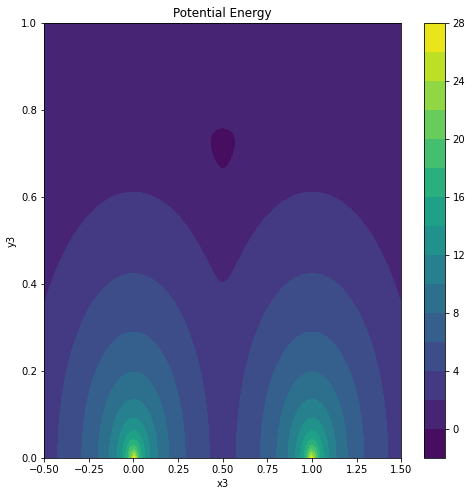

In [17]:
pos1 = (0, 0)
pos2 = (1, 0)
sigma = 0.77
epsilon = 1.98

x3list = np.linspace(-0.5, 1.5, 100)
y3list = np.linspace(0, 1, 100)
a, b = np.meshgrid(x3list, y3list)

PE = np.log10(U(pos1, pos2, (a, b)) + 6)

plt.contourf(x3list, y3list, PE, levels=15)
plt.colorbar()
plt.xlabel('x3')
plt.ylabel('y3')
plt.title('Potential Energy')

**(d)** Molecular system are driven by thermodynamics to adopt the lowest energy state possible.  Find the optimium coordinates of the particles by minimizing the total potential energy of the system specified in part (c).  

As your answer, report 
1. the coordinates for all three particles in the system, 
2. the minimum energy in this configuration, **and** 
3. plot their positions overlayed on the contour map of total potential energy.  

In [18]:
# define callable function for minimize
def U_(pos):
    return U(pos1, pos2, pos)
soln = minimize(U_, (0.1, 0.1))
pos3 = (round(soln.x[0], 3), round(soln.x[1], 3))

In [19]:
# print coordinates and minimum energy
print(f'Particle 1: {pos1}')
print(f'Particle 2: {pos2}')
print(f'Particle 3: {pos3}')
print(f'Minimum energy in this configuration: {round(soln.fun, 3)}')
print('Red dots represent the positions of the particles')

Particle 1: (0, 0)
Particle 2: (1, 0)
Particle 3: (0.5, 0.705)
Minimum energy in this configuration: -5.267
Red dots represent the positions of the particles


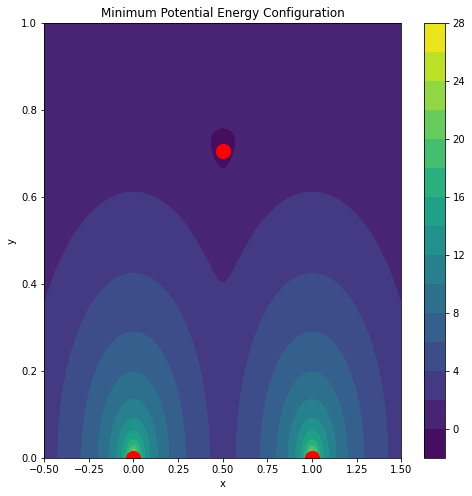

In [20]:
# plot
plt.contourf(x3list, y3list, PE, levels=15)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Minimum Potential Energy Configuration')

pointsx = [pos1[0], pos2[0], pos3[0]]
pointsy = [pos1[1], pos2[1], pos3[1]]
plt.scatter(pointsx, pointsy, s=200, c='red')

**(e)**  Repeat parts (c) and (d) for the situation when Particle 2 is located at $pos_2=(1.5, 0)$.

/var/folders/03/t8m2zm8x2q79p08k4vlwqj5r0000gn/T/ipykernel_64654/3441397140.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)
/var/folders/03/t8m2zm8x2q79p08k4vlwqj5r0000gn/T/ipykernel_64654/3441397140.py:2: RuntimeWarning: invalid value encountered in subtract
  return 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)


Text(0.5, 1.0, 'Potential Energy')

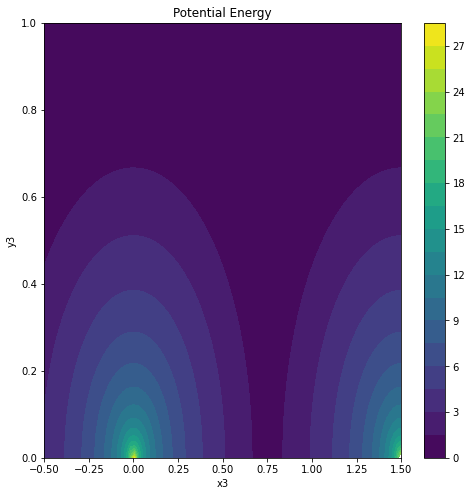

In [21]:
pos1 = (0, 0)
pos2 = (1.5, 0)
sigma = 0.77
epsilon = 1.98

x3list = np.linspace(-0.5, 1.5, 100)
y3list = np.linspace(0, 1, 100)
a, b = np.meshgrid(x3list, y3list)

PE = np.log10(U(pos1, pos2, (a, b)) + 6)

cp = plt.contourf(x3list, y3list, PE, levels=25)
plt.colorbar(cp)
plt.xlabel('x3')
plt.ylabel('y3')
plt.title('Potential Energy')

In [22]:
# define callable function for minimize
def U_(pos):
    return U(pos1, pos2, pos)
soln = minimize(U_, (0.1, 0.1))

In [23]:
# print coordinates and minimum energy
print(f'Particle 1: {pos1}')
print(f'Particle 2: {pos2}')
print(f'Particle 3: {pos3}')
print(f'Minimum energy in this configuration: {round(soln.fun, 3)}')

Particle 1: (0, 0)
Particle 2: (1.5, 0)
Particle 3: (0.5, 0.705)
Minimum energy in this configuration: -4.102


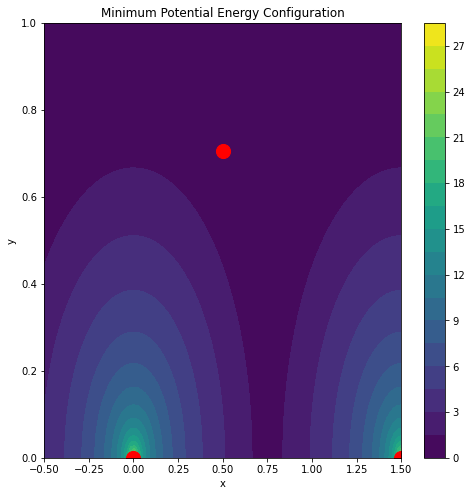

In [24]:
# plot
plt.contourf(x3list, y3list, PE, levels=25)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Minimum Potential Energy Configuration')

pointsx = [pos1[0], pos2[0], pos3[0]]
pointsy = [pos1[1], pos2[1], pos3[1]]
plt.scatter(pointsx, pointsy, s=200, c='red')

**(f)** Now assuming that Particle 2 can be located anywhere along the +x axis, what is the optimal configuration of the three particles in the system?  As your answer, report 
1. the coordinates for all three particles in the system,
2. the minimum energy in this configuration, **and**
3. plot their positions on the x-y axes (no contour plot necessary).

In [25]:
# define callable function for minimize
def U_(pos):
    return U(pos1, (pos[2], 0), (pos[0], pos[1]))
soln = minimize(U_, (0.1, 0.1, 0.1))
pos2 = (round(soln.x[2], 3), 0)
pos3 = (round(soln.x[0], 3), round(soln.x[1], 3))

In [26]:
# print coordinates and minimum energy
print(f'Particle 1: {pos1}')
print(f'Particle 2: {pos2}')
print(f'Particle 3: {pos3}')
print(f'Minimum energy in this configuration: {round(soln.fun, 3)}')

Particle 1: (0, 0)
Particle 2: (0.864, 0)
Particle 3: (0.432, 0.749)
Minimum energy in this configuration: -5.94


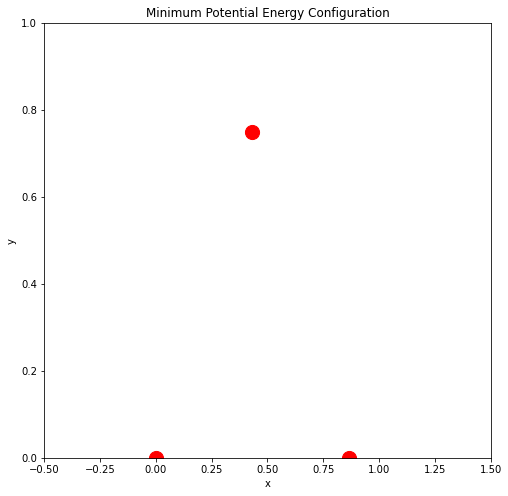

In [27]:
# plot
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-0.5, 1.5)
plt.ylim(0, 1)
plt.title('Minimum Potential Energy Configuration')

pointsx = [pos1[0], pos2[0], pos3[0]]
pointsy = [pos1[1], pos2[1], pos3[1]]
plt.scatter(pointsx, pointsy, s=200, c='red')

**(g)** What are the distances separating each pair of particles in the optimized system?  Comment on your observation and whether this meets your physical intuition about what should occur.

In [28]:
print(f'The distances (in nm) are: {round(dist_(pos1, pos2), 3)}, {round(dist_(pos1, pos3), 3)}, {round(dist_(pos2, pos3), 3)}')

The distances (in nm) are: 0.864, 0.865, 0.865


The distances between each pair of points are the same. This makes sense, since the three particles are identical, so there is no reason for the distance between any of the pairs to differ from one another.

**(h)** What configuration do you hypothesize would be adopted if the system now contained four identical particles?  Prove your hypothesis.

I hypothesise that the particles will be configured in such a way that three of the points form an equilateral triangle.

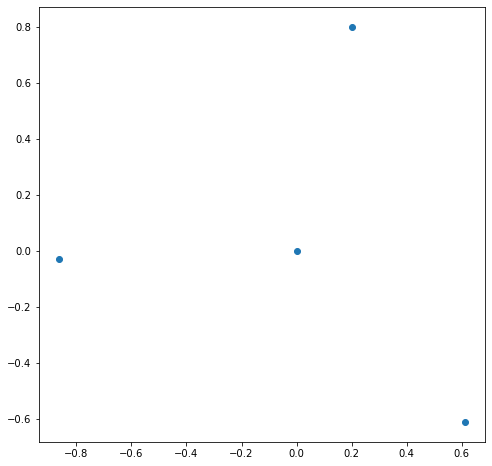

In [29]:
# set particle 1 at (0, 0)
def U_(pos_):
    sum = 0
    pos = pos_.tolist()
    pos.insert(0, 0)
    pos.insert(4, 0)
    for i in range(4):
        for j in range(i + 1, 4 - i - 1):
            sum += LJ(dist_((pos[i], pos[i + 4]), (pos[j],pos[j + 4])))
    return sum
soln = minimize(U_, [-0.8, 0.5, 0.2, 0.2, -0.5, 0.8])

posx = [0] + soln.x[:3].tolist()
posy = [0] + soln.x[3:].tolist()
plt.scatter(posx, posy)

I experimented with multiple sets of guesses, and all of them either failed to converge or formed an equilateral triangle with three points, with the fourth point placed close to one of the edges or the center.